In [63]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


In [64]:
from pydsge import DSGE, example

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from grgrlib import pplot

import os

In [65]:
config = {
    'figure.figsize':(10,3),
    'figure.dpi':144,
    'figure.facecolor':'white',
    'axes.grid':True,
    'grid.linestyle':'--',
    'grid.linewidth':0.5,
    'axes.spines.top':False,
    'axes.spines.bottom':False,
    'axes.spines.left':False,
    'axes.spines.right':False
}

plt.rcParams.update(config)

Loading model

In [66]:
# mod = DSGE.read(example[0])
# data = pd.read_csv(example[1])
mod = DSGE.read(os.path.join(MODEL_DIR, 'pydsge_example_nk.yaml'))

In [67]:
mod

A DSGE Model.

In [70]:
mod.equations

[Eq(Pi, beta*Pi(True) + kappa*y - z),
 Eq(c, c(True) - d - (-Pi(True) + r)/sigma),
 Eq(y, c),
 Eq(dy, y - y(True)),
 Eq(z, rho_z*z(True) + e_z),
 Eq(d, rho_u*d(True) + e_u),
 Eq(vr, rho_r*vr(True) + e_r),
 Eq(rn, rho*rn(True) + vr + (1 - rho)*(phi_pi*Pi + phi_y*y))]

In [40]:
mod.variables

[Pi, c, y, dy, r, rn, d, z, vr]

In [48]:
mod.sys[0].shape

(4, 8)

In [49]:
mod.shocks

['e_z', 'e_u', 'e_r']

In [52]:
mod.variables

[Pi, c, y, dy, r, rn, d, z, vr]

In [47]:
mod.sys[1].shape

(8, 8)

In [53]:
mod.__dict__.keys()

dict_keys(['func_file', 'const_obs', 'pcompile', 'parafunc', 'psi', 'PSI', 'ZZ0', 'ZZ1', 'AA', 'BB', 'CC', 'bb', 'bb_PSI', 'QQ', 'HH', 'par_fix', 'prior', 'prior_arg', 'prior_names', 'observables', 'vo', 've', 'fdict', 'name', 'description', 'path', 'debug', 'par', 'ppar', 'x_bar', 'vv', 'lks', 'svv', 'cvv', 'dimx', 'dimq', 'dimp', 'dimy', 'dimeps', 'hx', 'sys', 'ff', 'precalc_mat'])

In [62]:
mod.__dict__['sys']

(array([[-4.57034170e-17, -5.71894272e-01, -4.79363758e-01,
         -1.05272057e+00, -1.76622903e+00, -1.50388653e+00,
         -6.84805368e-01, -2.52318433e+00],
        [-5.30536724e-16, -1.39323254e+00, -1.45648533e+00,
          1.05942531e+00, -2.95569625e+00,  1.51346473e+00,
         -2.08069333e+00, -4.22242321e+00],
        [-1.00000000e+00, -1.39323254e+00, -1.45648533e+00,
          1.05942531e+00, -2.95569625e+00,  1.51346473e+00,
         -2.08069333e+00, -4.22242321e+00],
        [ 3.83862224e-17,  5.70725134e-01, -1.99395811e-01,
         -3.31439362e-01,  2.55897224e-02, -4.73484802e-01,
         -2.84851158e-01,  3.65567463e-02]]),
 array([[ 2.78370705e-17, -1.39323254e+00, -1.45648533e+00,
          1.05942531e+00, -2.95569625e+00,  1.51346473e+00,
         -2.08069333e+00, -4.22242321e+00],
        [-1.51308269e-16,  5.70725134e-01, -1.99395811e-01,
         -3.31439362e-01,  2.55897224e-02, -4.73484802e-01,
         -2.84851158e-01,  3.65567463e-02],
        [ 1.40

In [39]:
mod.get_cov()

[RE solver:]    Done in 0.0. Determinant of `Z11` is -2.51e-02. There are 8 EVs o.u.c. (of 12).
[preprocess:]   Preprocessing finished within 0.01624s.
[get_sys:]      Creation of system matrices finished in 0.017s.


array([[0.3, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 0.3]])

In [25]:
mod.get_par(asdict=True)

({'beta': 0.99,
  'theta': 0.66,
  'sigma': 1.5,
  'phi_pi': 1.7,
  'phi_y': 0.125,
  'rho_u': 0.7,
  'rho_z': 0.7,
  'rho_r': 0.7,
  'mu_d': 0.15,
  'sig_u': 0.5,
  'sig_z': 0.3,
  'sig_r': 0.3,
  'rho': 0.8,
  'y_mean': 0.35563,
  'pi_mean': 0.5,
  'elb_level': 0.07},
 {'kappa': 0.17855, 'x_bar': -0.9401})

In [26]:
par = mod.set_par('calib')
par

array([0.99      , 0.66      , 1.5       , 1.7       , 0.125     ,
       0.7       , 0.7       , 0.7       , 0.15      , 0.5       ,
       0.3       , 0.3       , 0.8       , 0.35562565, 0.5       ,
       0.07      ])

IRF simulations

In [27]:
shock_list = ('e_u', 4.0, 0) # (name, size, period)
X1, (L1, K1), _ = mod.irfs(shock_list, verbose=True)

In [28]:
X1

,Pi,c,dy,r,y,rn,d,z,vr
0,-3.020223,-9.188900,-9.188900,-0.940101,-9.188900,-1.256598,4.000000,0.000000e+00,0.0
1,-1.393466,-4.886657,4.302243,-0.940101,-4.886657,-1.601223,2.800000,0.000000e+00,0.0
2,-0.526208,-2.362586,2.524071,-0.940101,-2.362586,-1.518954,1.960000,0.000000e+00,0.0
3,-0.105419,-0.959041,1.403545,-0.940101,-0.959041,-1.274982,1.372000,0.000000e+00,0.0
4,0.066485,-0.258098,0.700943,-0.940101,-0.258098,-1.003833,0.960400,0.000000e+00,0.0
5,0.113705,-0.000236,0.257862,-0.764412,-0.000236,-0.764412,0.672280,9.440431e-17,0.0
6,0.114896,0.085838,0.086074,-0.570319,0.085838,-0.570319,0.470596,1.375986e-16,0.0
7,0.100576,0.109171,0.023333,-0.419330,0.109171,-0.419330,0.329417,1.494805e-16,0.0
8,0.081902,0.104433,-0.004738,-0.305007,0.104433,-0.305007,0.230592,1.436189e-16,0.0
9,0.063894,0.089091,-0.015342,-0.220054,0.089091,-0.220054,0.161414,1.288309e-16,0.0


In [8]:
# sampling from priors
par0 = mod.get_par('prior', nsamples=100, verbose=True)

Adding parameters to the prior distribution...
   - theta as beta (0.5, 0.1). Init @ 0.7813, with bounds (0.5, 0.95)
   - sigma as normal (1.5, 0.375). Init @ 1.2312, with bounds (0.25, 3)
   - phi_pi as normal (1.5, 0.25). Init @ 1.7985, with bounds (1.0, 3)
   - phi_y as normal (0.125, 0.05). Init @ 0.0893, with bounds (0.001, 0.5)
   - rho_u as beta (0.5, 0.2). Init @ 0.7, with bounds (0.01, 0.9999)
   - rho_r as beta (0.5, 0.2). Init @ 0.7, with bounds (0.01, 0.9999)
   - rho_z as beta (0.5, 0.2). Init @ 0.7, with bounds (0.01, 0.9999)
   - rho as beta (0.75, 0.1). Init @ 0.8, with bounds (0.5, 0.975)
   - sig_u as inv_gamma_dynare (0.1, 2). Init @ 0.5, with bounds (0.025, 5)
   - sig_r as inv_gamma_dynare (0.1, 2). Init @ 0.5, with bounds (0.01, 3)
   - sig_z as inv_gamma_dynare (0.1, 2). Init @ 0.5, with bounds (0.01, 3)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:07<00:00,  1.28s/it]

(prior_sample:) Sampling done. Check fails for 0.00% of the prior.


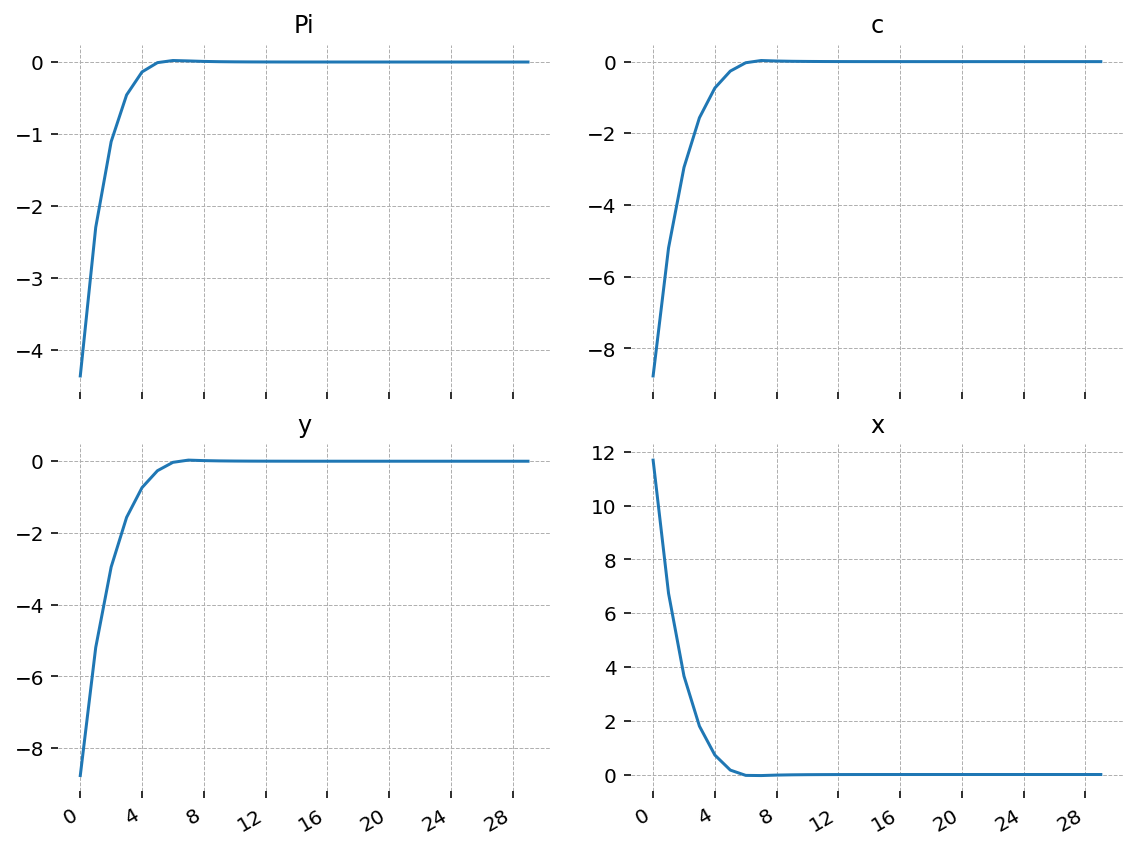

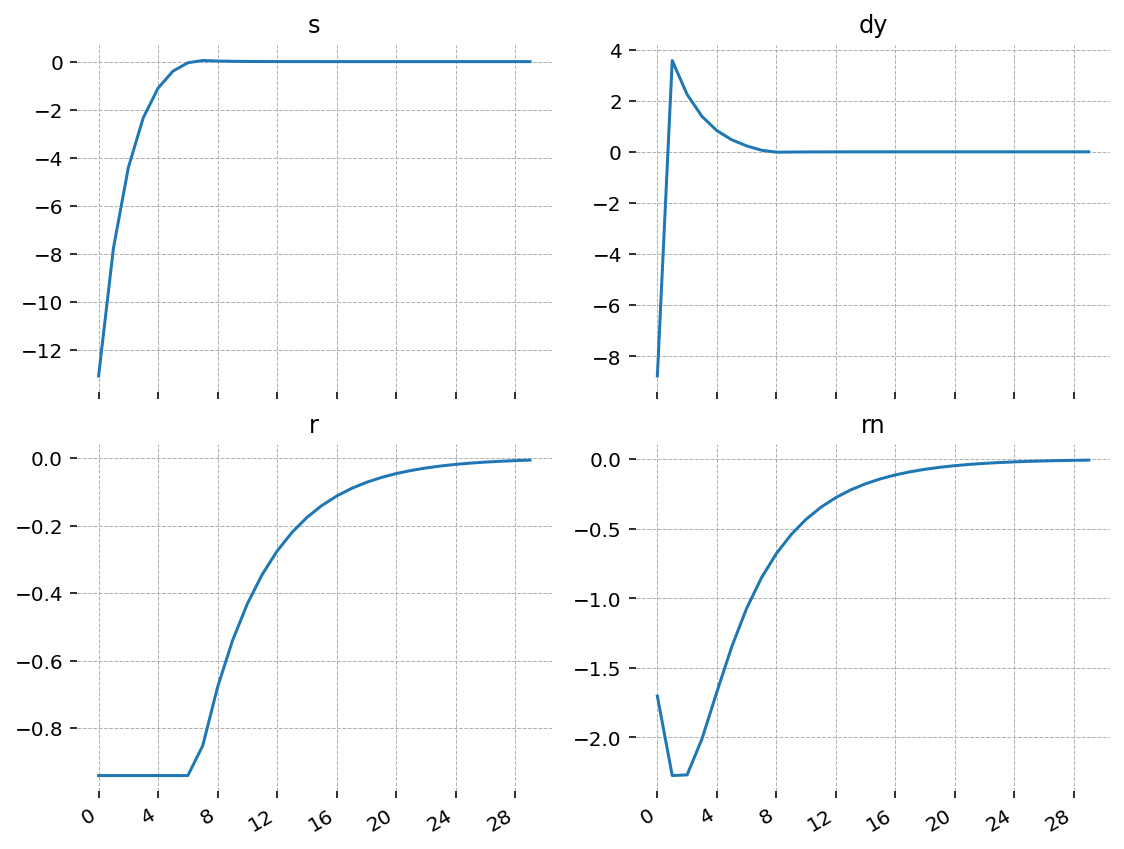

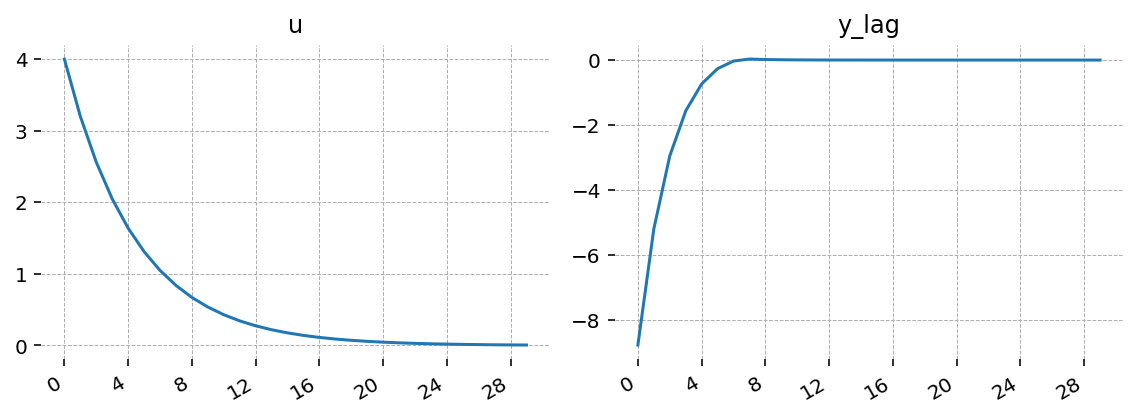

In [9]:
figs, axs, _ = pplot(X1)

[irfs:]        No OBC solution(s) found.


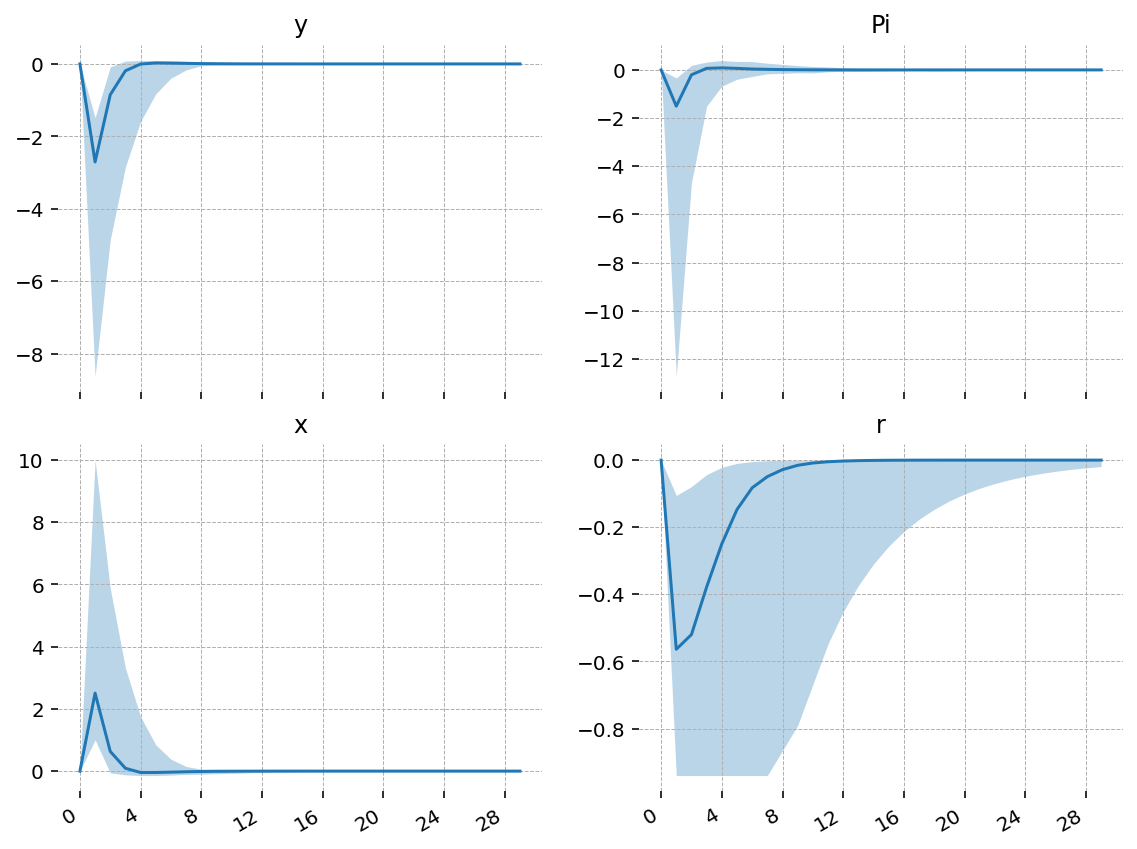

In [10]:
mod.set_par('calib')
shock_list = ('e_u', 3., 1) # (name, size, period)

X1, LK1, _ = mod.irfs(shock_list, par0, verbose=True)
v = mod.vix(('y','Pi','x','r')) # get the indices of these four variables
figs, axs, _ = pplot(X1[...,v], labels=mod.vv[v])